# 🧠 REDES NEURONALES
## 🧪 Facultad de Ciencias
## 🏫 Universidad Nacional Autónoma de México

<hr>

### 📄 Práctica No. 01

#### Realizado por:
#### Iván Alejadro Ramos Herrera
#### 💜 [@arhcoder](https://github.com/arhcoder)



# [01]
# 📚 Selección de Dataset

## MNIST
### Fuente: sklearn.datasets.load_digits
### Información del dataset:

> Load and return the digits dataset (classification). Each datapoint is a 8x8 image of a digit.

|                   |      |
|-------------------|------|
| Classes           | 10   |
| Samples per class | ~180 |
| Samples total     | 1797 |
| Dimensionality    | 64   |
| Features integers | 0-16 |

> We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

> For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.



In [370]:
# Se obtiene el dataset:
from sklearn.datasets import load_digits
digits = load_digits()

## Exploración

In [371]:
# Explorando el dataset:
print("Data:\n", digits.data,)
print("\nTamaños:", digits.data.shape)
print("\nImágen:\n", digits.images[0])
print("\nTargets:", digits.target)

Data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Tamaños: (1797, 64)

Imágen:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Targets: [0 1 2 ... 8 9 8]


🔎 Según la documentación, el dataset incluye miles de imágenes de 8x8 que contienen el dibujo de cada uno de los dígitos escritos a mano del 0 al 10. Aproximadamente 180 ejemplos por cada dígito.

Las imágenes están representadas como matrices de 8x8 en $digits.images$, en donde esto retorna una lista con cada imágen.

En $digits.data$ se incluyen todas las imágenes como un vector de 64 features.

En $digits.target$ se incluyen las clasificaciones.

# [02]
# 📑 Separación en Entrenamiento y Test
### Se hará una separación de los datos en un esquema 70% entrenamiento y 30% evaluación.

## Separación

In [403]:
import random

# Se establecen las variables:
X = digits.data
y = digits.target

# Se hace un shuffle al dataset para evitar sesgos:
data = list(zip(X, y))
random.shuffle(data)
X, y = zip(*data)

# Se separa en 70% - 30%:
train_size = int(0.7 * len(X))

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print("X de Entrenamiento:", len(X_train))
print("X de Evaluación:", len(X_test))
print("\ny de Entrenamiento:", len(y_train))
print("y de Evaluación:", len(y_test))

X de Entrenamiento: 1257
X de Evaluación: 540

y de Entrenamiento: 1257
y de Evaluación: 540


# [03]
# 🧠 Modelo del Perceptrón
## Perceptrón para clasificación.

## Perceptrón

In [373]:
import numpy as np

# CLASE DEL PERCEPTRÓN #
class Perceptron:

  # Constructor para instanciar un Perceptrón:
  def __init__(self, classes, inputs, activation_function="identity"):


  # ATRIBUTOS #
    self.classes = classes
    self.inputs = inputs
    self.activation_functions = {
      "identity": lambda x: x,
      "step": lambda x: np.where(x >= 0, 1, 0),
      "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
      "relu": lambda x: np.maximum(0, x),
      "tanh": lambda x: np.tanh(x)
    }
    self.activation_function = self.activation_functions[activation_function]

    # Los vectores de pesos y sesos se inicializan de manera aleatoria:
    self.weights = np.random.rand(classes, inputs)
    self.biases = np.random.rand(classes)



  # MÉTODOS #
  # Función de Entrenamiento:
  def train(self, X_train, y_train, learning_rate, iterations):
    '''
      Entradas:
        - X_train: Matriz de datos de entrenamiento.
        - y_train: Vector de etiquetas de entrenamiento.
      Proceso:
        - Mediante el algoritmo propuesto en clase por el
          profesor, se actualizan los pesos de las conexiones.
    '''

    # Para las iteraciones:
    for _ in range(iterations):

      # Para el conjunto de datos:
      for j in range(len(X_train)):

        # Forward:
        x = X_train[j]
        y = y_train[j]
        W = self.weights
        b = self.biases
        f = self.activation_function(W @ x + b)

        # Backward:
        self.weights[y] += learning_rate * x
        self.biases[y] += learning_rate
        self.weights[np.argmax(f)] -= learning_rate * x
        self.biases[np.argmax(f)] -= learning_rate



  # Función de Predicción:
  def predict(self, X):
    '''
    Entradas:
      - X: Matriz de datos de entrada para predecir.
    Salida:
      - y_prediction: Etiqueta predicha.
    '''

    # Forward:
    W = self.weights
    b = self.biases
    f = self.activation_function(X @ W.T + b)

    # Predicción:
    y_prediction = np.argmax(f, axis=1)
    return y_prediction




  # Función de Evaluación:
  def accuracy(self, X_test, y_test):
    '''
    Entradas:
      - X_test: Matriz de datos de prueba.
      - y_test: Etiquetas verdaderas de prueba.
    Salida:
      - accuracy: Accuracy (exactitud) del modelo.
    '''

    # Predice sobre el X_test:
    y_pred = self.predict(X_test)

    # Calcula el accuracy:
    correct_predictions = 0
    total_samples = len(y_test)

    for true_label, predicted_label in zip(y_test, y_pred):
      if true_label == predicted_label:
        correct_predictions += 1

    return correct_predictions / total_samples

## Implementación
Acá se creará una instancia del Perceptrón creado, se entrenará y se evaluará.

In [374]:
import warnings
warnings.filterwarnings("ignore")

In [404]:
# INSTANCIA DEL PERCEPTRÓN:
#   - Clases: 10;
#   - Inputs: 64;
#   - Función: Sigmoide;
perceptron = Perceptron(classes=10, inputs=64, activation_function="sigmoid")

# ENTRENAMIENTO DEL PERCEPTRÓN:
#   - Tasa de aprendizaje: 0.01;
#   - Iteraciones: 2000;
perceptron.train(X_train, y_train, learning_rate=0.01, iterations=1000)

# EVALUACIÓN DEL PERCEPTRÓN:
accuracy = perceptron.accuracy(X_test, y_test)
print(f"Exactitud: {accuracy*100:.2f}%")

Exactitud: 90.37%


## Funciones de Activación
Se crearán múltiples instancias con diferentes funciones de activación para medir su exactitud.

In [431]:
# MÚLTIPLES INSTANCIAS DEL PERCEPTRÓN PARA PROBAR
# DISTINTAS FUNCIONES DE ACTIVACIÓN:

functions = ["identity", "step", "sigmoid", "relu", "tanh"]
learning_rate = 0.01
iterations = 1000
classes = len(np.unique(y))
inputs = digits.data.shape[1]

print("Variables del Modelo")
print(" * Tasa de aprendizaje:", learning_rate)
print(" * Iteraciones:", iterations)
print(" * Clases:", classes)
print(" * Entradas:", inputs)
print(" * Función de Activación:")

# Prueba para cada Función de Activación:
perceptrons = list()
for function in functions:

  # Crea el Perceptrón:
  perceptron = Perceptron(classes=classes, inputs=inputs, activation_function=function)

  # Entrena el Perceptrón:
  perceptron.train(X_train, y_train, learning_rate=learning_rate, iterations=iterations)

  # Evalúa el Perceptrón:
  accuracy = perceptron.accuracy(X_test, y_test)

  # Impresión estética:
  max_function_name_length = max(len(function) for function in functions)
  formatted_function = f"[{function}]:".ljust(max_function_name_length + 3)
  print(f"    * {formatted_function}\t\t{accuracy*100:.2f}%")

  # Guarda los Perceptrones:
  perceptrons.append({"Perceptron": perceptron, "Function": function, "Accuracy": accuracy})

Variables del Modelo
 * Tasa de aprendizaje: 0.01
 * Iteraciones: 1000
 * Clases: 10
 * Entradas: 64
 * Función de Activación:
    * [identity]:		97.41%
    * [step]:    		90.56%
    * [sigmoid]: 		90.56%
    * [relu]:    		97.04%
    * [tanh]:    		90.19%


## Resultados
### Se obtuvieron los siguientes accuracies para las diferentes Funciones de Activación seleccionadas:

Variables del Modelo
 * Tasa de aprendizaje: 0.01
 * Iteraciones: 1000
 * Clases: 10
 * Entradas: 64
 * Función de Activación:
    * [identity]:		96.48%
    * [step]:    		91.67%
    * [sigmoid]: 		90.93%
    * [relu]:    		95.37%
    * [tanh]:    		91.85%

### Los mejores resultados en la clasificación de este dataset se obtienen con la función de activación de identidad.

# [04]
# 🧮 Visualización de PESOS

## Analizando la forma del Perceptrón

1. Nuestro problema tiene 64 pixeles para cada ejemplo de entrenamiento; es decir, tiene 64 características cada ejemplo; es decir, nuestra red tiene 64 entradas (64 neuronas de entrada).

2. Nuestro problema debe clasificar a 10 clases; por ende tendrá 10 neuronas de salida.

Dado que tenemos 64 neuronas de entrada, que se conectan en su completitud con 10 neuronas de salida, tenemos PARA CADA SALIDA DE LAS 10, UN VECTOR DE 64 PESOS, PARA CADA UNA DE LAS 64 CONEXIONES.

**POR ENDE, NUESTRA RED CONTIENE UNA MATRIZ DE PESOS DE 64 X 10, EN DONDE CADA NEURONA DE SALIDA (CLASE) TIENE SUS 64 PESOS RESPECTIVOS; QUE PROVOCA QUE SE ACTIVE O NO DICHA NEURONA...**

## Analizando cada imágen
Cada valor de entrenamiento corresponde a una imágen de un número dibujado a mano (de 8x8 pixeles), es decir, de 64 características...

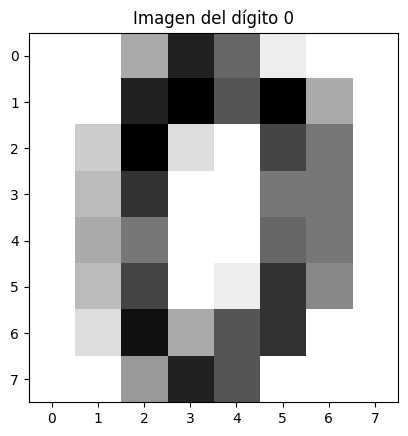

In [432]:
# Visualizando un ejemplo de entrenamiento como matriz:
import matplotlib.pyplot as plt

imagen = digits.images[0]
etiqueta = digits.target[0]

# Mostrar la imagen:
plt.imshow(imagen, cmap=plt.cm.gray_r)
plt.title(f"Imagen del dígito {etiqueta}")
plt.show()

In [433]:
# Selecciona el Perceptrón con el mejor Accuracy:
best = perceptrons[0]
for perceptron in perceptrons:
  if perceptron["Accuracy"] >= best["Accuracy"]:
    best = perceptron

# Resultados del mejor:
print(f"Mejor Perceptrón:\n * Función [{best['Function']}]\n * Accuracy: {best['Accuracy']*100:.2f}%")

Mejor Perceptrón:
 * Función [identity]
 * Accuracy: 97.41%


## Visualización de PESOS para la Clase 0
### Se utilizará el esquema de color "binary" de matplotlib y se representarán los pesos como una matriz de 8 x 8 para simular cómo resultaría la imágen.

El gráfico de calor de pesos nos debería dibujar con más intensidad los pixeles que resultan más importantes (pesos) para la determinación de la clase, tal como si se coloreara el texto (por ello el esquema "binary" que va de blanco a nergro según la intensidad crezca).

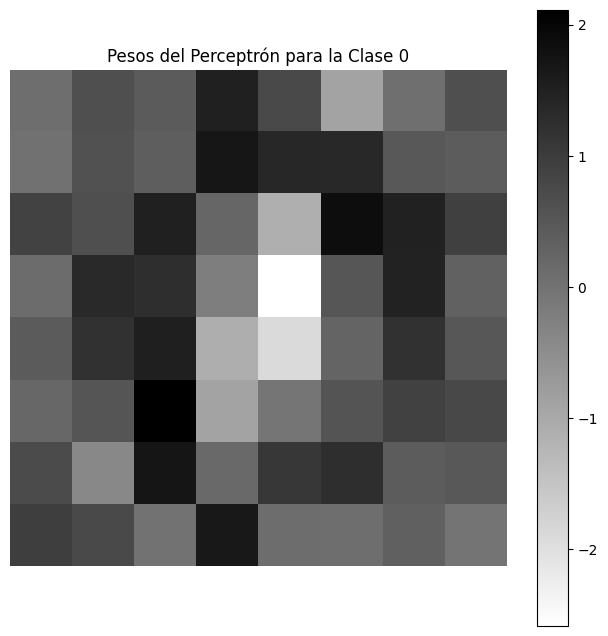

In [434]:
import matplotlib.pyplot as plt

# Matriz de PESOS del mejor perceptrón para la clase 0:
weights_class_0 = best["Perceptron"].weights[0, :]
weights_class_0 = weights_class_0.reshape((8, 8))

# Gráfica de calor:
plt.figure(figsize=(8, 8))
plt.imshow(weights_class_0, cmap="binary")
plt.title("Pesos del Perceptrón para la Clase 0")
plt.colorbar()
plt.axis("off")
plt.show()

## Visualización completa de PESOS
### SE VISUALIZARÁN LOS PESOS EN MAPA DE CALOR PARA CADA UNA DE LAS CLASES.

Debería hacerse visible qué pixeles tienen más importancia para cada clase y por ende una imágen general de lo que cada clase representa.

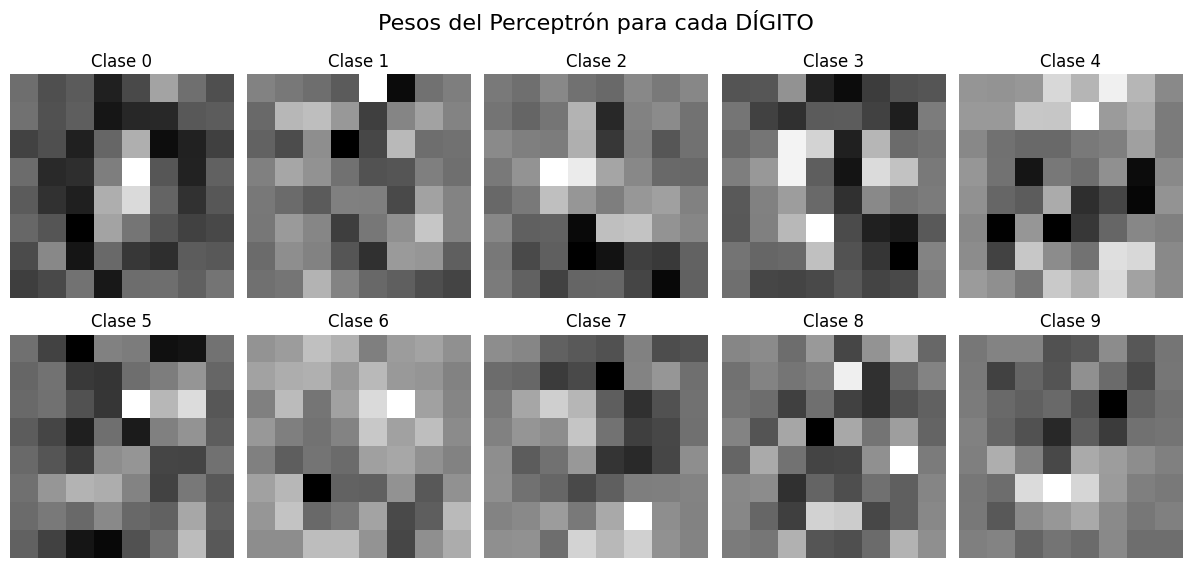

In [436]:
import matplotlib.pyplot as plt

# Crea una figura con subtramas para cada clase:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Pesos del Perceptrón para cada DÍGITO", fontsize=16)

# Para cada clase:
for i in range(10):
    # Obtiene la matriz de pesos:
    weights_class_i = best["Perceptron"].weights[i, :]
    weights_class_i = weights_class_i.reshape((8, 8))

    # Ubica la gráfica:
    row, col = i // 5, i % 5
    ax = axes[row, col]

    # Gráficas individuales:
    ax.imshow(weights_class_i, cmap="binary")
    ax.set_title(f"Clase {i}")
    ax.axis("off")

# Muestra las gráficas:
plt.tight_layout(pad=1.0)
plt.show()

# [05]
# 📈 Más métricas de Evaluación
## Precisión, Recall, F1, Exactitud, Micro-Average y Weighted-Average.

## Cálculo de Métricas

In [446]:
import numpy as np

# Matriz de confusión:
def confusion_matrix(y_true, y_pred, classes):
  confusion_matrix = np.zeros((classes, 2, 2))

  for true_label, predicted_label in zip(y_true, y_pred):
    # Encuentra los Verdaderos Positivos (TP: True Positives):
    if true_label == predicted_label:
      confusion_matrix[true_label, 0, 0] += 1
    else:
      # (FN: False Negatives):
      confusion_matrix[true_label, 1, 0] += 1
      # (TN: True Negatives):
      confusion_matrix[predicted_label, 1, 1] += 1
      # (FP: False Positives):
      confusion_matrix[predicted_label, 0, 1] += 1

  return confusion_matrix


# Precisión:
def precision(confusion_matrix):
  TP = confusion_matrix[:, 0, 0]
  FP = confusion_matrix[:, 0, 1]
  precision = TP / (TP + FP)
  return precision


# Recall:
def recall(confusion_matrix):
  TP = confusion_matrix[:, 0, 0]
  FN = confusion_matrix[:, 1, 0]
  recall = TP / (TP + FN)

  return recall

# F1:
def f1(precision, recall):
  f1 = 2 * (precision * recall) / (precision + recall)
  return f1


# Micro-Average:
def micro_average(confusion_matrix):
  TP = np.sum(confusion_matrix[:, 0, 0])
  FP = np.sum(confusion_matrix[:, 0, 1])
  micro_average = TP / (TP + FP)

  return micro_average


# Weighted-Average:
def weighted_average(precision):
    classes = len(precision)
    weights = np.bincount(y_test)
    weighted_average = np.sum(precision * weights) / np.sum(weights)

    return weighted_average


# Predice con el mejor perceptrón encontrado:
perceptron = best["Perceptron"]
y_pred = perceptron.predict(X_test)

# Encuentra las métricas de evaluación:
confusion_matrix = confusion_matrix(y_test, y_pred, classes=10)
precision = precision(confusion_matrix)
recall = recall(confusion_matrix)
f1 = f1(precision, recall)
micro_average = micro_average(confusion_matrix)
weighted_average = weighted_average(precision)

# RESULTADOS FINALES:
# Imprime las métricas por clase
for i in range(10):
  print("\n______________________________")
  print(f"\nCLASE {i}:")
  print(f"Matriz de Confusión:\n{confusion_matrix[i]}")
  print(f"Precisión: {precision[i]*100:.2f}%")
  print(f"Recall: {recall[i]*100:.2f}%")
  print(f"F1: {f1[i]*100:.2f}%")

print("\n______________________________\n\nRESULTADOS GLOBALES")
print(f"\nMicro-Average: {micro_average*100:.2f}%")
print(f"\nWeighted-Average: {weighted_average*100:.2f}%")
print("\n______________________________\n")


______________________________

CLASE 0:
Matriz de Confusión:
[[49.  1.]
 [ 0.  1.]]
Precisión: 98.00%
Recall: 100.00%
F1: 98.99%

______________________________

CLASE 1:
Matriz de Confusión:
[[60.  1.]
 [ 3.  1.]]
Precisión: 98.36%
Recall: 95.24%
F1: 96.77%

______________________________

CLASE 2:
Matriz de Confusión:
[[59.  1.]
 [ 0.  1.]]
Precisión: 98.33%
Recall: 100.00%
F1: 99.16%

______________________________

CLASE 3:
Matriz de Confusión:
[[46.  2.]
 [ 1.  2.]]
Precisión: 95.83%
Recall: 97.87%
F1: 96.84%

______________________________

CLASE 4:
Matriz de Confusión:
[[59.  1.]
 [ 2.  1.]]
Precisión: 98.33%
Recall: 96.72%
F1: 97.52%

______________________________

CLASE 5:
Matriz de Confusión:
[[51.  1.]
 [ 0.  1.]]
Precisión: 98.08%
Recall: 100.00%
F1: 99.03%

______________________________

CLASE 6:
Matriz de Confusión:
[[54.  2.]
 [ 1.  2.]]
Precisión: 96.43%
Recall: 98.18%
F1: 97.30%

______________________________

CLASE 7:
Matriz de Confusión:
[[58.  1.]
 [ 3.  1.]]
P

## RESULTADOS GLOBALES

______________________________

**CLASE 0**:
Matriz de Confusión:
**[[49.  1.]
 [ 0.  1.]]**
Precisión: **98.00%**
Recall: **100.00%**
F1: **98.99%**

______________________________

**CLASE 1**:
Matriz de Confusión:
**[[60.  1.]
 [ 3.  1.]]**
Precisión: **98.36%**
Recall: **95.24%**
F1: **96.77%**

______________________________

**CLASE 2**:
Matriz de Confusión:
**[[59.  1.]
 [ 0.  1.]]**
Precisión: **98.33%**
Recall: **100.00%**
F1: **99.16%**

______________________________

**CLASE 3**:
Matriz de Confusión:
**[[46.  2.]
 [ 1.  2.]]**
Precisión: **95.83%**
Recall: **97.87%**
F1: **96.84%**

______________________________

**CLASE 4**:
Matriz de Confusión:
**[[59.  1.]
 [ 2.  1.]]**
Precisión: **98.33%**
Recall: **96.72%**
F1: **97.52%**

______________________________

**CLASE 5**:
Matriz de Confusión:
**[[51.  1.]
 [ 0.  1.]]**
Precisión: **98.08%**
Recall: **100.00%**
F1: **99.03%**

______________________________

**CLASE 6**:
Matriz de Confusión:
**[[54.  2.]
 [ 1.  2.]]**
Precisión: **96.43%**
Recall: **98.18%**
F1: **97.30%**

______________________________

**CLASE 7**:
Matriz de Confusión:
**[[58.  1.]
 [ 3.  1.]]**
Precisión: **98.31%**
Recall: **95.08%**
F1: **96.67%**

______________________________

**CLASE 8**:
Matriz de Confusión:
**[[44.  3.]
 [ 2.  3.]]**
Precisión: **93.62%**
Recall: **95.65%**
F1: **94.62%**

______________________________

**CLASE 9**:
Matriz de Confusión:
**[[46.  1.]
 [ 2.  1.]]**
Precisión: **97.87%**
Recall: **95.83%**
F1: **96.84%**

______________________________

Micro-Average: **97.41%**

Weighted-Average: **97.42%**

______________________________

# [06]
## Realizado por:
### Iván Alejadro Ramos Herrera
### 💜 [@arhcoder](https://github.com/arhcoder)